In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas_datareader as df
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
#We are going to use the Indian Company "GAIL(Gas Authority of India Ltd)" stock value
stock_symbol = 'GAIL.NS'

In [3]:
#We have taken last 8 years data with interval of 1 day
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
end_date = dt.date(year, month, day)
#end_date = dt.datetime.strptime("2022-02-11", "%Y-%m-%d").date()
start_date=end_date-dt.timedelta(days=365*5)
data = yf.download(tickers=stock_symbol,start=start_date,end=end_date,interval='1d')

Enter a date in YYYY-MM-DD format2022-03-21
[*********************100%***********************]  1 of 1 completed


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-03-22,138.337540,139.425034,137.756287,138.375031,112.304649,8086003.0
2017-03-23,139.087540,141.712540,138.525040,141.337540,114.709000,10187933.0
2017-03-24,141.356277,143.625031,140.625031,142.987534,116.048119,9179917.0
2017-03-27,143.550034,144.000031,140.643784,140.887527,114.343773,5957651.0
2017-03-28,141.543777,141.543777,139.350037,140.550034,114.069870,9107608.0


In [6]:
data.describe() #We are displaying the characteristics of the dataset

,Open,High,Low,Close,Adj Close,Volume
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000,1.234000e+03
mean,144.316266,146.440506,141.930012,143.982423,124.899861,1.258432e+07
std,28.884216,29.060665,28.596453,28.815575,22.892300,9.703150e+06
min,68.449997,72.250000,65.000000,69.400002,62.700565,3.999520e+05
25%,128.000000,129.899994,125.712498,128.000000,110.404707,6.920120e+06
50%,146.250000,148.700020,144.325005,146.074997,131.477005,9.791348e+06
75%,168.237499,170.843750,165.268745,167.599998,142.649555,1.513617e+07
max,197.000000,199.699997,192.100006,196.899994,163.547394,1.147153e+08


In [7]:
len(data)

1235

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-14,153.899994,156.399994,150.899994,152.350006,147.315308,17853417.0
2022-03-15,151.600006,151.899994,146.699997,148.449997,143.544189,20524474.0
2022-03-16,149.699997,152.800003,148.000000,152.399994,147.363647,15249761.0
2022-03-17,153.250000,154.149994,150.600006,151.300003,146.300003,18044254.0
2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

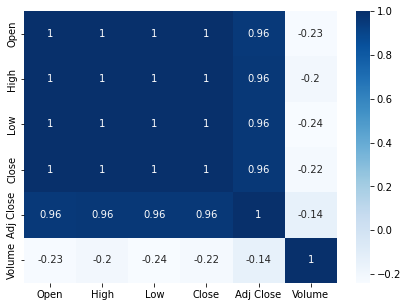

In [9]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),cmap="Blues",annot=True)
#It displays the co-relation between the columns of the dataset

In [10]:
d2=data.copy()

In [11]:
d2['open-high'] = d2['Open']-d2['High']
d2['open-low'] = d2['Open'] - d2['Low']
d2['close-high'] = d2['Close']-d2['High']
d2['close-low'] = d2['Close'] - d2['Low']
d2['high-low'] = d2['High'] - d2['Low']
d2['open-close'] = d2['Open'] - d2['Close']
d2=d2.drop(['Open','High','Low','Close','Adj Close'],axis=1)
d2.tail()

,Volume,open-high,open-low,close-high,close-low,high-low,open-close
Date,,,,,,,
2022-03-14,17853417.0,-2.500000,3.000000,-4.049988,1.450012,5.500000,1.549988
2022-03-15,20524474.0,-0.299988,4.900009,-3.449997,1.750000,5.199997,3.150009
2022-03-16,15249761.0,-3.100006,1.699997,-0.400009,4.399994,4.800003,-2.699997
2022-03-17,18044254.0,-0.899994,2.649994,-2.849991,0.699997,3.549988,1.949997
2022-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

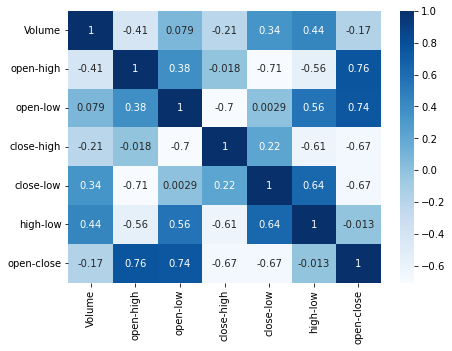

In [12]:
plt.figure(figsize=(7,5))
sns.heatmap(d2.corr(),cmap="Blues",annot=True)

In [13]:
opn = data[['Open']] #It denotes the opening stock value

<AxesSubplot:xlabel='Date'>

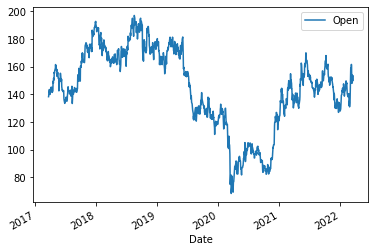

In [14]:
opn.plot()

In [15]:
ds = opn.values

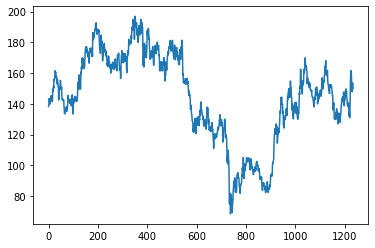

In [16]:
plt.plot(ds)

In [17]:
#We are using MinMaxScaler for scaling (Subtracts the min value and divides by the range)
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [54]:
print(ds_scaled)

[[0.54366037]
 [0.54949468]
 [0.56714336]
 ...
 [0.63204977]
 [0.65966551]
 [       nan]]


In [18]:
ds_scaled.shape

(1235, 1)

In [19]:
#We are defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [20]:
train_size,test_size

(864, 371)

In [21]:
#We are splitting dataset into train and test dataset
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled)-1,:1]

In [22]:
len(ds_train),len(ds_test)

(864, 370)

In [23]:
#we created a function for making a time series dataset for the model
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [24]:
#We are taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds(ds_test,time_stamp)

In [25]:
X_train.shape,y_train.shape

((763, 100), (763,))

In [26]:
X_test.shape, y_test.shape

((269, 100), (269,))

In [27]:
#We are reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

from keras.models import Sequential
from keras.layers import Dense, LSTM

In [28]:
#In this step, we created an LSTM model using keras
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
#We trained the model with adam optimizer and mean squared error loss function
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=128,verbose=1)

Epoch 1/50
6/6 [==============================] - 8s 626ms/step - loss: 0.2395 - val_loss: 0.0095
Epoch 2/50
6/6 [==============================] - 2s 286ms/step - loss: 0.0414 - val_loss: 0.0042
Epoch 3/50
6/6 [==============================] - 2s 305ms/step - loss: 0.0260 - val_loss: 0.0138
Epoch 4/50
6/6 [==============================] - 2s 323ms/step - loss: 0.0161 - val_loss: 0.0131
Epoch 5/50
6/6 [==============================] - 2s 289ms/step - loss: 0.0149 - val_loss: 0.0061
Epoch 6/50
6/6 [==============================] - 2s 277ms/step - loss: 0.0099 - val_loss: 0.0054
Epoch 7/50
6/6 [==============================] - 2s 271ms/step - loss: 0.0081 - val_loss: 0.0060
Epoch 8/50
6/6 [==============================] - 2s 270ms/step - loss: 0.0066 - val_loss: 0.0043
Epoch 9/50
6/6 [==============================] - 2s 264ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 10/50
6/6 [==============================] - 2s 271ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 11/50
6/6 [==

In [30]:
model.save('keras.model.h5')

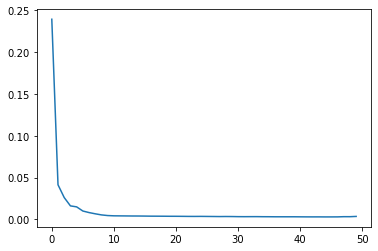

In [31]:
#While pLotting loss, we found that loss has decreased significantly and the model has been trained well
loss = model.history.history['loss']
plt.plot(loss)

In [32]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [33]:
#Inverse transform to get actual value
train_predict = normalizer.inverse_transform(train_predict)
test_predict = normalizer.inverse_transform(test_predict)

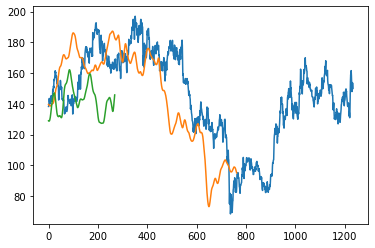

In [34]:
#Comparing using visuals
plt.plot(normalizer.inverse_transform(ds_scaled)) #Blue line
plt.plot(train_predict) #Orange line
plt.plot(test_predict) #Green line

In [35]:
type(train_predict)

numpy.ndarray

In [36]:
test = np.vstack((train_predict,test_predict))

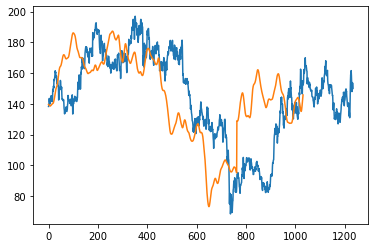

In [37]:
#Combining the predicted data to create uniform data visualization
plt.plot(normalizer.inverse_transform(ds_scaled))
plt.plot(test)

In [38]:
len(ds_test)

370

In [39]:
ds_test.size

370

In [84]:
#We are going to analyse the last 100 days records
fut_inp = ds_test[ds_test.size-100:]

In [85]:
fut_inp = fut_inp.reshape(1,-1)

In [86]:
tmp_inp = list(fut_inp)

In [87]:
fut_inp.shape

(1, 100)

In [88]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [89]:
#Predicting next 30 days price using the current data, It will predict in sliding window manner algorithm with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.62204509973526], [0.6292381882667542], [0.6343668103218079], [0.6376550197601318], [0.6394093036651611], [0.639948308467865], [0.639562726020813], [0.6384968161582947], [0.6369426846504211], [0.6350427865982056], [0.6328988671302795], [0.6305787563323975], [0.6281265020370483], [0.6255686283111572], [0.622920036315918], [0.6201893091201782], [0.6173802614212036], [0.6144964098930359], [0.6115391850471497], [0.6085113883018494], [0.6054157018661499], [0.6022552251815796], [0.5990338325500488], [0.5957557559013367], [0.5924252867698669], [0.5890465378761292], [0.5856239795684814], [0.5821618437767029], [0.5786641836166382], [0.5751349329948425]]


In [90]:
len(ds_scaled)

1235

In [91]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

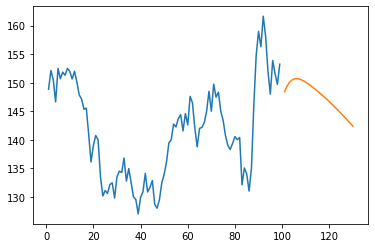

In [92]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[ds_scaled.size-100:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [93]:
ds_new = ds_scaled.tolist()

In [94]:
len(ds_new)

1235

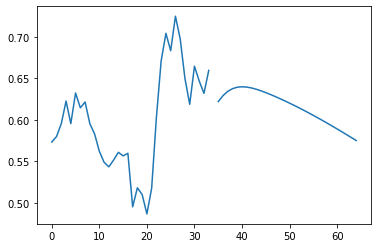

In [95]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [96]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

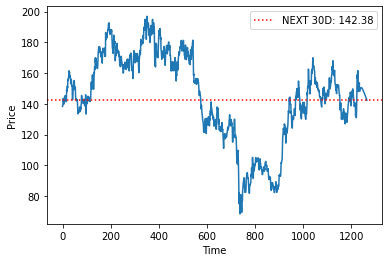

In [98]:
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Days")
#plt.title("{0} prediction of next month open".format(options))
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()